In [1]:
import talib as ta
import pandas as pd
from my_logging import logger
from macd_backtester import MACDBacktester

In [2]:
filepath = "bitcoin.csv"
symbol = "BTCUSDT"
start = "2017-08-17"
mid1 = "2019-09-01"
end = "2021-10-07"
tc = -0.0006

In [3]:
backtester = MACDBacktester(filepath=filepath, symbol=symbol,start=start,end=end,tc=tc)

In [4]:
macd = (12,26,9)


In [5]:
backtester.test_strategy(macd=macd)

MACD STRATEGY | INSTRUMENT = BTCUSDT | MAs = [12, 26, 9]
PERFORMANCE MEASURES:


Multiple (Strategy):         0.225207
Multiple (Buy-and-Hold):     12.46517
--------------------------------------
Out-/Underperformance:       -12.239963


CAGR:                        -0.302735
Annualized Mean:             -0.360451
Annualized Std:              0.911037
Sharpe Ratio:                -0.332297


In [6]:
backtester.optimize_strategy(15,31,10,"Multiple")

MA_SLOW: 14 | SMA_FAST: 30 | SMA_SIGNAL: 9 | Multiple: 0.81071 | Sharpe: -0.05437
MACD STRATEGY | INSTRUMENT = BTCUSDT | MAs = [14, 30, 9]
PERFORMANCE MEASURES:


Multiple (Strategy):         0.810714
Multiple (Buy-and-Hold):     12.703807
--------------------------------------
Out-/Underperformance:       -11.893093


CAGR:                        -0.049491
Annualized Mean:             -0.050744
Annualized Std:              0.910257
Sharpe Ratio:                -0.05437


In [7]:
backtester.results_overview

,MA_SLOW,MA_FAST,MA_SIGNAL,Multiple,Sharpe
0,1,1,1,-1.000000,-1.000000
1,1,1,2,-1.000000,-1.000000
2,1,1,3,-1.000000,-1.000000
3,1,1,4,-1.000000,-1.000000
4,1,1,5,-1.000000,-1.000000
...,...,...,...,...,...
3775,14,30,5,0.017316,-0.684869
3776,14,30,6,0.073295,-0.513815
3777,14,30,7,0.138302,-0.417322
3778,14,30,8,0.419464,-0.208115


In [8]:
result_pd = backtester.results_overview.copy()

In [9]:
result_pd

,MA_SLOW,MA_FAST,MA_SIGNAL,Multiple,Sharpe
0,1,1,1,-1.000000,-1.000000
1,1,1,2,-1.000000,-1.000000
2,1,1,3,-1.000000,-1.000000
3,1,1,4,-1.000000,-1.000000
4,1,1,5,-1.000000,-1.000000
...,...,...,...,...,...
3775,14,30,5,0.017316,-0.684869
3776,14,30,6,0.073295,-0.513815
3777,14,30,7,0.138302,-0.417322
3778,14,30,8,0.419464,-0.208115


In [10]:
result = result_pd.loc[result_pd["Multiple"]>0]

In [11]:
result

,MA_SLOW,MA_FAST,MA_SIGNAL,Multiple,Sharpe
288,2,3,1,2.744159e-58,-1.148095
297,2,4,1,7.126312e-62,-1.162108
306,2,5,1,1.040453e-63,-1.170513
315,2,6,1,4.439623e-65,-1.177386
324,2,7,1,6.898794e-66,-1.181970
...,...,...,...,...,...
3775,14,30,5,1.731562e-02,-0.684869
3776,14,30,6,7.329476e-02,-0.513815
3777,14,30,7,1.383016e-01,-0.417322
3778,14,30,8,4.194644e-01,-0.208115


In [12]:
sort = result.sort_values(by=["Multiple"],ascending=False)

In [13]:
sort

,MA_SLOW,MA_FAST,MA_SIGNAL,Multiple,Sharpe
3779,14,30,9,8.107143e-01,-0.054370
3770,14,29,9,6.657988e-01,-0.102939
3752,14,27,9,6.617876e-01,-0.104376
3707,14,22,9,5.835241e-01,-0.134052
3500,13,29,9,5.735224e-01,-0.138188
...,...,...,...,...,...
486,2,25,1,2.083320e-70,-1.209301
504,2,27,1,1.928089e-70,-1.209839
513,2,28,1,1.617837e-70,-1.210315
522,2,29,1,1.344215e-70,-1.210765


In [14]:
sort["Multiple"] = round(sort["Multiple"],5)

In [ ]:
result_pd.info

In [16]:
sort

,MA_SLOW,MA_FAST,MA_SIGNAL,Multiple,Sharpe
3779,14,30,9,0.81071,-0.054370
3770,14,29,9,0.66580,-0.102939
3752,14,27,9,0.66179,-0.104376
3707,14,22,9,0.58352,-0.134052
3500,13,29,9,0.57352,-0.138188
...,...,...,...,...,...
486,2,25,1,0.00000,-1.209301
504,2,27,1,0.00000,-1.209839
513,2,28,1,0.00000,-1.210315
522,2,29,1,0.00000,-1.210765


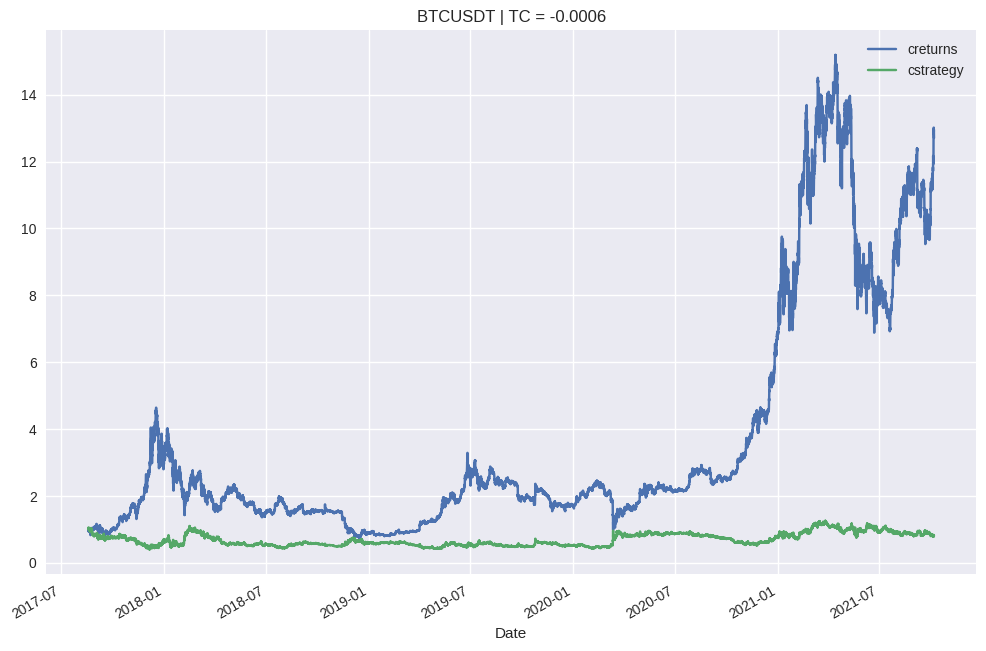

In [17]:
backtester.plot_results()